In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

sns.set(style="whitegrid")
%matplotlib inline


In [6]:
filename = "Advertising.csv"

In [7]:

df = pd.read_csv(filename)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


print("Shape:", df.shape)
display(df.head())
print("Columns:", list(df.columns))


Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Columns: ['TV', 'Radio', 'Newspaper', 'Sales']


In [8]:

print("Null values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

for c in features + [target]:
    if c not in df.columns:
        raise ValueError(f"Column '{c}' not found in CSV. Available columns: {df.columns.tolist()}")

X = df[features]
y = df[target]


Null values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data types:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


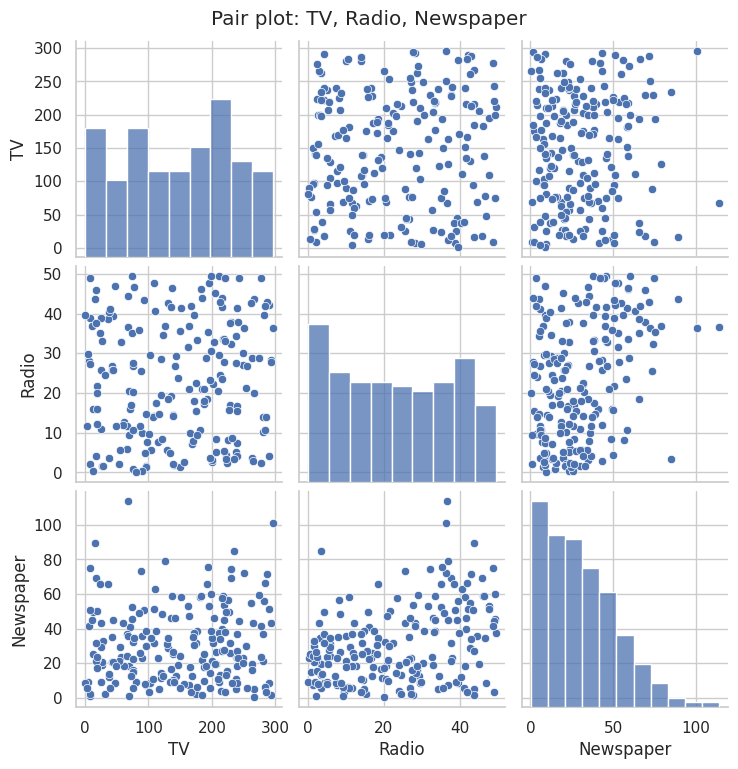

In [9]:
sns.pairplot(df[features])
plt.suptitle("Pair plot: TV, Radio, Newspaper", y=1.02)
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (160, 3) X_test: (40, 3)


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])
svr_pipe.fit(X_train, y_train)
y_pred_svr = svr_pipe.predict(X_test)

print("Models trained.")


Models trained.


,Model,MAE,MSE,RMSE
0,LinearRegression,1.460757,3.174097,1.781600
1,Polynomial(d=2),0.526179,0.412910,0.642581
2,SVR(RBF),1.162139,2.862109,1.691777


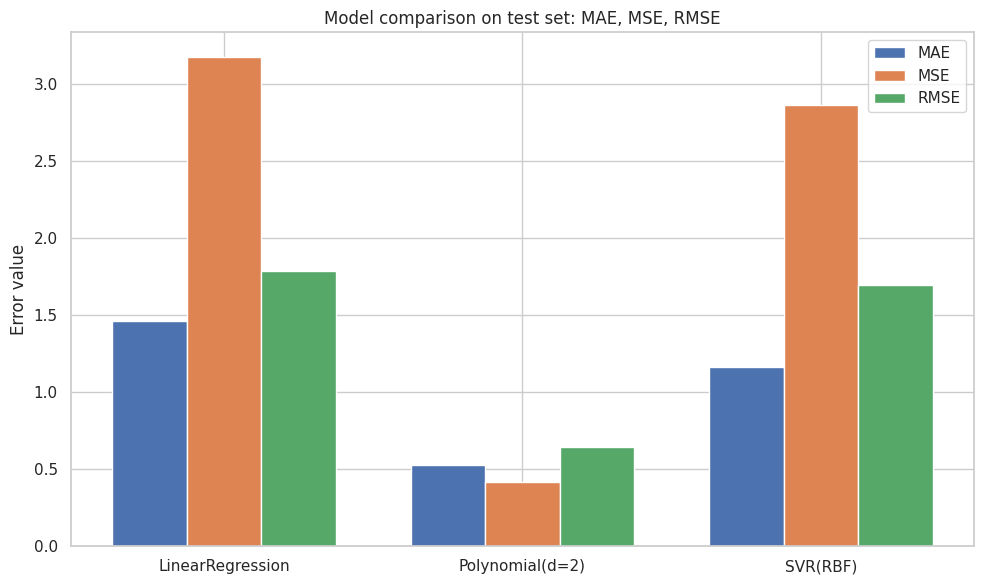

In [12]:

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

metrics = {
    "LinearRegression": evaluate(y_test, y_pred_lr),
    "Polynomial(d=2)": evaluate(y_test, y_pred_poly),
    "SVR(RBF)": evaluate(y_test, y_pred_svr)
}

metrics_df = pd.DataFrame(metrics, index=["MAE", "MSE", "RMSE"]).T.reset_index().rename(columns={'index':'Model'})
display(metrics_df)

labels = metrics_df['Model'].tolist()
mae_vals = metrics_df['MAE'].values
mse_vals = metrics_df['MSE'].values
rmse_vals = metrics_df['RMSE'].values

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae_vals, width=width, label='MAE')
plt.bar(x, mse_vals, width=width, label='MSE')
plt.bar(x + width, rmse_vals, width=width, label='RMSE')
plt.xticks(x, labels)
plt.ylabel("Error value")
plt.title("Model comparison on test set: MAE, MSE, RMSE")
plt.legend()
plt.tight_layout()
plt.show()


Cluster counts:
Cluster
1    75
0    65
2    60
Name: count, dtype: int64


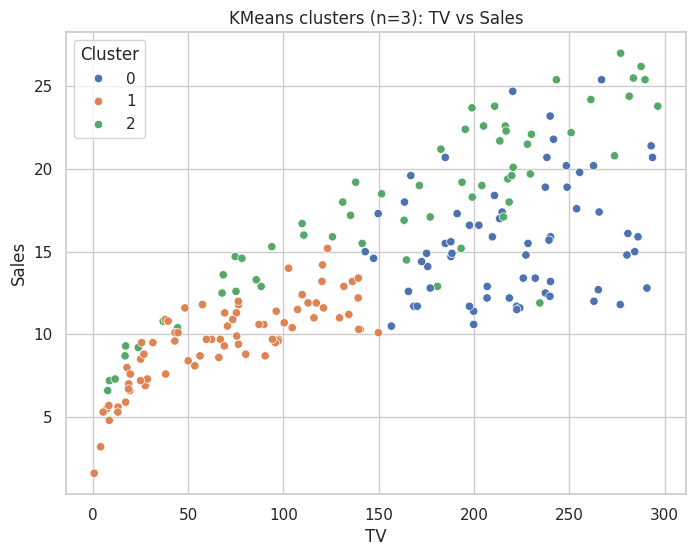

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print("Cluster counts:")
print(df['Cluster'].value_counts())

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='deep')
plt.title("KMeans clusters (n=3): TV vs Sales")
plt.show()
